# Spiking Phasor VSA: Simple Demos

## Prelims

In [12]:
from numpy import *
from matplotlib.pyplot import *
from tqdm import tqdm
from phasorutils import *
from brian2 import *
from spikingVSA import *
from copy import deepcopy

# Simple Demos

## Adding Phases (convolution)

In [3]:
N = 1      # How many neurons in a layer
freq = 1.  # Baseline oscillation frequency (Hz)
T = 4      # Simulation time (seconds)

net = SpikingPhasorNet()

# Neuron A spikes at 0.3 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.3)]), freq=freq); net.add_pop(A)
# Neuron B spikes at 0.45 seconds
B = GenerateSP(N=N, C=array([exp(2j*pi*0.45)]), freq=freq); net.add_pop(B)

# Neuron C receives computes the sum of the phases.
C = PhaseSumPop(N=N, freq=freq); net.add_pop(C)
net.convolve(A, B, C)
net.br.add(C.stmon)

net.run(T*second)

In [4]:
print(f'A spikes: {A.spmon.spike_trains()[0]}')
print(f'B spikes: {B.spmon.spike_trains()[0]}')
print(f'C spikes: {C.spmon.spike_trains()[0]}')

A spikes: [0.3 1.3 2.3 3.3] s
B spikes: [0.45 1.45 2.45 3.45] s
C spikes: [0.7502 1.7501 2.75   3.7499] s


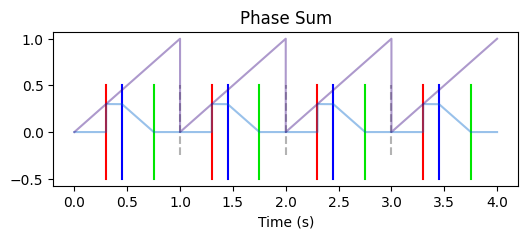

In [5]:
xcolour = (0.2, 0, 0.5, 0.4)
pcolour = (0., 0.4, 0.8, 0.4)
thcolour = (0.3, 0.3, 0.3, 0.4)

figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.25, 0.5, colors=0.7*ones((3,)), linestyles='dashed');
plot(C.stmon.t, C.stmon.q[0], color=pcolour);
plot(C.stmon.t, C.stmon.x[0], color=xcolour);
title('Phase Sum'); ylabel('');

### Phase wrap into next cycle
The sum of the phases is larger than the cycle, so the spike ends up in the next cycle. But it's all consistent with the fact that these spikes are all periodic.

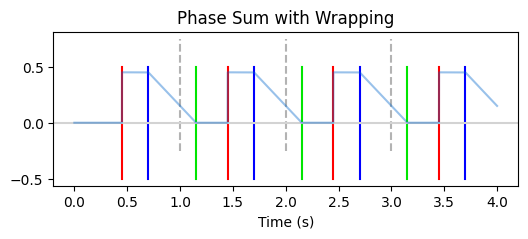

In [6]:
N = 1
freq = 1.
T = 4

net = SpikingPhasorNet()

# Neuron A spikes at 0.45 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.45)]), freq=freq); net.add_pop(A)
# Neuron B spikes at 0.7 seconds
B = GenerateSP(N=N, C=array([exp(2j*pi*0.7)]), freq=freq); net.add_pop(B)

C = PhaseSumPop(N=N, freq=freq); net.add_pop(C)
net.convolve(A, B, C)
net.br.add(C.stmon)

net.run(T*second)

figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.25, 0.75, colors=0.7*ones((3,)), linestyles='dashed');
plt.axhline(0, color='lightgray')
plot(C.stmon.t, C.stmon.q[0], color=pcolour);
title('Phase Sum with Wrapping'); ylabel('');

## Subtracting Phases (deconvolution)

In [7]:
# Figure 2A
N = 1
freq = 1.
T = 4

net = SpikingPhasorNet()

# Neuron B spikes at 0.15 seconds
B = GenerateSP(N=N, C=array([exp(2j*pi*0.15)]), freq=freq); net.add_pop(B)
# Neuron A spikes at 0.6 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.6)]), freq=freq); net.add_pop(A)

C = PhaseDiffPop(N=N, freq=freq); net.add_pop(C)
net.deconvolve(A, B, C)

net.run(T*second)

In [8]:
print(f'A spikes: {A.spmon.spike_trains()[0]}')
print(f'B spikes: {B.spmon.spike_trains()[0]}')
print(f'C spikes: {C.spmon.spike_trains()[0]}')

A spikes: [0.6 1.6 2.6 3.6] s
B spikes: [0.15 1.15 2.15 3.15] s
C spikes: [0.6001 1.4501 2.4502 3.4503] s


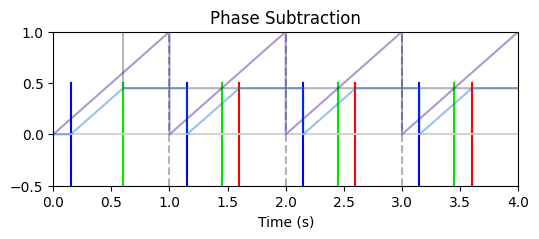

In [9]:
figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.5, 1.5, colors=0.7*ones((3,)), linestyles='dashed');
plt.axhline(0, color='lightgray')
plot(C.stmon.t, C.stmon.Dphi[0], color=thcolour);
plot(C.stmon.t, C.stmon.x[0], color=xcolour);
plot(C.stmon.t, C.stmon.p[0], color=pcolour);
axis([0,4,-0.5, 1]); ylabel('');
title('Phase Subtraction');

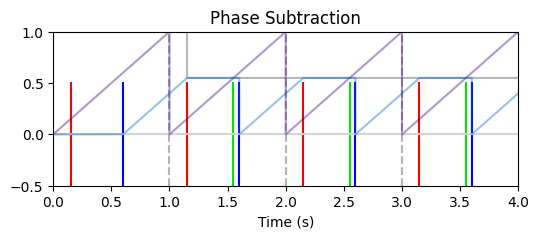

In [10]:
# Figure 2B
N = 1
freq = 1.
T = 4

net = SpikingPhasorNet()

# Neuron A spikes at 0.15 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.15)]), freq=freq); net.add_pop(A)
# Neuron B spikes at 0.6 seconds
B = GenerateSP(N=N, C=array([exp(2j*pi*0.6)]), freq=freq); net.add_pop(B)

C = PhaseDiffPop(N=N, freq=freq); net.add_pop(C)
net.deconvolve(A, B, C)

net.run(T*second)

figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.5, 1.5, colors=0.7*ones((3,)), linestyles='dashed');
plt.axhline(0, color='lightgray')
plot(C.stmon.t, C.stmon.Dphi[0], color=thcolour);
plot(C.stmon.t, C.stmon.x[0], color=xcolour);
plot(C.stmon.t, C.stmon.p[0], color=pcolour);
axis([0,4,-0.5, 1]); ylabel('');
title('Phase Subtraction');

## Phase Multiplication (fractional binding)

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: 'th_post = (-0.5) + ((0.5 + (x_post * alpha265)) % 1)'
 [brian2.codegen.generators.base]


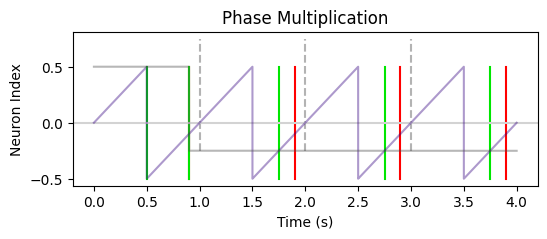

In [11]:
N = 1
freq = 1.
T = 4

net = SpikingPhasorNet()

# Neuron A spikes at 0.9 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.9)]), freq=freq); net.add_pop(A)

C = PhaseMultPop(N=N, freq=freq); net.add_pop(C)
net.fractional_bind(A, C, 2.5)

net.run(T*second)

figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
#B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.25, 0.75, colors=0.7*ones((3,)), linestyles='dashed');
plt.axhline(0, color='lightgray')
plot(C.stmon.t, C.stmon.x[0], color=xcolour);
plot(C.stmon.t, C.stmon.th[0], color=thcolour);
plt.title('Phase Multiplication');